# 닮은 연예인 찾기

## 1. 연예인 얼굴 인식하기

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

### image 종류 확인

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['심수창.jpeg', '정민철.jpg', '이대형.jpg', '잇섭.png', '배성재.jpg', '박항서.jpg', '조원희.jpg', '제프리 힌턴.jpg', '이명박.jpg', '이안 굿펠로우.jpg', '성시경.jpg', '김윤석.jpeg', '슈가.jpg', '박서준.jpeg', '제이콥 배털론.jpg', '조인성.jpg', '박용택.jpg', '장성호.jpeg', '이연걸.jpeg', '씨잼.jpg', '김영삼.jpeg', '이범수.jpeg', '앤드류 응.png', '이용진.jpg', '류현진.jpg', '홍구.jpg', '서강준.jpg', 'clinton.jpeg', '로다주.jpeg', '박찬호.jpg', '장동건.jpeg', '이영하.jpg', '숀 코네리.jpg', '정준하.jpg', '조승우.jpeg', '철면수심.jpg', '슈퍼비.jpeg', '정수빈.jpg', '유희열.jpeg', '이말년.png', '잭 스페이더.jpeg', '제이홉.jpg', '문재인.jpeg', '이진호.jpeg', '박찬욱.jpeg', '이재용.jpg', '영알남.png', '이승철.jpeg', '방시혁.jpeg', '서장훈.jpg', '최현석.jpg', '박진영.jpg', '주진모(올드).jpg', '존 파브르.jpeg', '이경규.jpeg', '크리스 햄스워스.jpg', '유해진.jpg', '이준혁.jpeg', '박보검.jpg', '꽈두룹.jpeg', '아놀드 슈워제네거.jpg', '안재홍.jpg', '윤도현.png', '정우성.jpeg', '켄 정.jpeg', '크리스 에반스.jpg', '류준열.jpg', '톰 홀랜드.jpg', '저스틴 존슨.jpeg', '지드래곤.jpeg', '박휘순.jpg', '김대명.jpeg', '김광현.jpg', '하현우.jpg', '김현수.jpeg', '송중기.jpeg', '한기범.jpg', '매드클라운.jpeg', '진.jpg', '마크 러팔로.jpeg', '김경진.png', '유지태.jpg', '김대중.

### 내 얼굴 확인

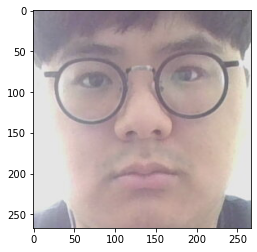

In [3]:
image_file = os.path.join(dir_path, 'my_face.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

plt.imshow(face)

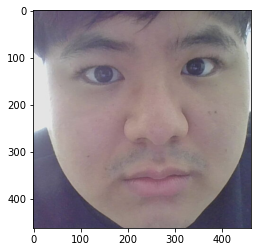

In [4]:
image_file = os.path.join(dir_path, 'my_face_3.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
plt.imshow(face)

## 2. 얼굴 이미지 임베딩하기

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['my_face_3']

array([-0.11806376,  0.0993425 ,  0.02388772, -0.12426569, -0.06846941,
       -0.10078856,  0.00114987, -0.12973881,  0.11163212, -0.10381719,
        0.26668075, -0.15269361, -0.24055834, -0.11752457, -0.03932022,
        0.20697433, -0.17763798, -0.08471493, -0.06890512, -0.01023139,
        0.10755876, -0.04632577,  0.00188452,  0.08336121, -0.06599891,
       -0.36197841, -0.1224665 , -0.09592944, -0.07003065, -0.04815784,
        0.04428792,  0.02527758, -0.17270944, -0.06207364,  0.00608396,
       -0.00209833, -0.05941484, -0.07048276,  0.18918531, -0.03483126,
       -0.19200954, -0.02187711,  0.11914881,  0.22267652,  0.10974179,
        0.09120251,  0.03178141, -0.13450581,  0.08172922, -0.15524834,
        0.02527722,  0.11698192,  0.04353797,  0.05561431,  0.05773466,
       -0.11224863,  0.09477925,  0.08451821, -0.20323928, -0.00374344,
        0.11485934, -0.05291693, -0.08218102, -0.09166142,  0.32047218,
        0.10550523, -0.14314832, -0.1509023 ,  0.18253194, -0.10

### 내 2개의 얼굴간의 노름 찾기

In [7]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('my_face', 'my_face_3')


0.4291967464411444

## 3. 내 얼굴과 비슷한 연예인 얼굴 찾고 matplotlib로 시각화하기

In [8]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [9]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0: 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    

In [10]:
get_nearest_face('my_face')

순위 1 : 이름(my_face_3), 거리(0.4291967464411444)
순위 2 : 이름(이영하), 거리(0.4831569695622288)
순위 3 : 이름(박성호), 거리(0.497816613970499)
순위 4 : 이름(슈퍼비), 거리(0.5009868237829813)
순위 5 : 이름(매드클라운), 거리(0.5120104426340845)
순위 6 : 이름(이말년), 거리(0.5148605036583479)
순위 7 : 이름(목진화), 거리(0.5227686156230482)
순위 8 : 이름(하현우), 거리(0.5252211651362898)
순위 9 : 이름(방시혁), 거리(0.52532667029315)
순위 10 : 이름(박진영), 거리(0.5257553602376542)


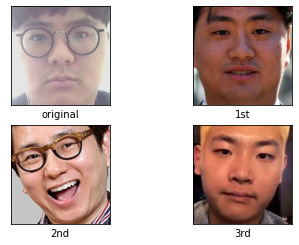

In [16]:
original_face = os.path.join(dir_path, 'my_face.jpg')
original = get_gropped_face(original_face)
youngha = os.path.join(dir_path, '이영하.jpg')
face1 = get_gropped_face(youngha)
sh = os.path.join(dir_path, '박성호.jpg')
face2 = get_gropped_face(sh)
superbee = os.path.join(dir_path, '슈퍼비.jpeg')
face3 = get_gropped_face(superbee)


fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.imshow(original)
ax.set_xlabel('original')
ax.set_xticks([]), ax.set_yticks([])
ax = fig.add_subplot(2,2,2)
ax.imshow(face1)
ax.set_xlabel('1st')
ax.set_xticks([]), ax.set_yticks([])
ax = fig.add_subplot(2,2,3)
ax.imshow(face2)
ax.set_xlabel('2nd')
ax.set_xticks([]), ax.set_yticks([])
ax = fig.add_subplot(2,2,4)
ax.imshow(face3)
ax.set_xlabel('3rd')
ax.set_xticks([]), ax.set_yticks([])
plt.show()

In [17]:
get_nearest_face('my_face_3')

순위 1 : 이름(my_face), 거리(0.4291967464411444)
순위 2 : 이름(이영하), 거리(0.47180841373981286)
순위 3 : 이름(옥냥이), 거리(0.5046595247216826)
순위 4 : 이름(이진호), 거리(0.5119580108385144)
순위 5 : 이름(슈퍼비), 거리(0.5127232142390175)
순위 6 : 이름(노홍철), 거리(0.515093954157079)
순위 7 : 이름(안재홍), 거리(0.5180856170025808)
순위 8 : 이름(이대형), 거리(0.5206240375352618)
순위 9 : 이름(김광현), 거리(0.521152696073507)
순위 10 : 이름(이말년), 거리(0.5212071681276581)


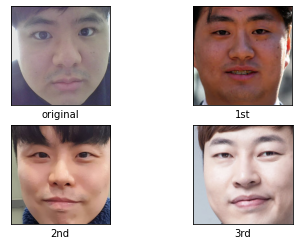

In [18]:
original_face = os.path.join(dir_path, 'my_face_3.jpg')
original = get_gropped_face(original_face)
youngha = os.path.join(dir_path, '이영하.jpg')
face1 = get_gropped_face(youngha)
sh = os.path.join(dir_path, '옥냥이.jpeg')
face2 = get_gropped_face(sh)
superbee = os.path.join(dir_path, '이진호.jpeg')
face3 = get_gropped_face(superbee)


fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.imshow(original)
ax.set_xlabel('original')
ax.set_xticks([]), ax.set_yticks([])
ax = fig.add_subplot(2,2,2)
ax.imshow(face1)
ax.set_xlabel('1st')
ax.set_xticks([]), ax.set_yticks([])
ax = fig.add_subplot(2,2,3)
ax.imshow(face2)
ax.set_xlabel('2nd')
ax.set_xticks([]), ax.set_yticks([])
ax = fig.add_subplot(2,2,4)
ax.imshow(face3)
ax.set_xlabel('3rd')
ax.set_xticks([]), ax.set_yticks([])
plt.show()

## 결론

이번에 가장 노력을 기울인 부분은 최대한 다양한 얼굴 데이터를 모으는것이었다. 비단 잘생긴 연예인 뿐만 아니라 개그맨, 스포츠스타, 스트리머들을 넣어 데이터의 폭을 늘려주었다.     
처음에 결과가 나왔을때 닮았나..?라는 생각을 했는데 막상 top3 사진을 비교해보니... 정말 닮았다라는 생각이 많이 들었다.    
다음에는 웹으로 띄울 수 있게 시도해서 재미있는 기능을 추가해보고 싶다.